python2 版

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [29]:
df = pd.read_csv("tmp/testlog.csv")
df.time = df.time.apply(lambda x: int(x))
df.src = df.src.apply(lambda x: int(x))
df.dst = df.dst.apply(lambda x: int(x))
df.sport = df.sport.apply(lambda x: int(x))
df.dport = df.dport.apply(lambda x: int(x))
df.byte = df.byte.apply(lambda x: int(x))
df.head()


,time,src,dst,sport,dport,byte
0,1490985285,3232238295,3232236718,15301,1008,59835
1,1490985285,3232238199,3232238000,19246,638,60855
2,1490985285,3232238199,3232238000,19246,638,107860
3,1490985285,3232238199,3232238000,19246,638,56829
4,1490985285,3232238199,3232238000,19246,638,110987


In [30]:
dfg = df.groupby('time')['src'].count()
dfg.head()

time
1490985285     55
1490985286      1
1490985287    402
1490985288    114
1490985289    401
Name: src, dtype: int64

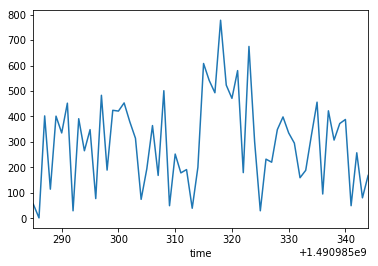

In [31]:
dfg.plot()

In [32]:
import sys
import array

sys.path.append(".")
import cryptopan2

key = array.array('B',range(32))
obj = cryptopan2.CryptoPAn(key)

df2 = df.copy()

df2.src = df2.src.apply(lambda x: obj.anonymize(int(x),4,32))
df2.dst = df2.dst.apply(lambda x: obj.anonymize(int(x),4,32))

df2.head()


,time,src,dst,sport,dport,byte
0,1490985285,43382231,43383398,15301,1008,59835
1,1490985285,43382134,43382768,19246,638,60855
2,1490985285,43382134,43382768,19246,638,107860
3,1490985285,43382134,43382768,19246,638,56829
4,1490985285,43382134,43382768,19246,638,110987


In [64]:
df2.to_csv('tmp/testlog2.log',index=False)

In [34]:
dfg2 = df2.groupby('time')['src'].count()
dfg2.head()


time
1490985285     55
1490985286      1
1490985287    402
1490985288    114
1490985289    401
Name: src, dtype: int64

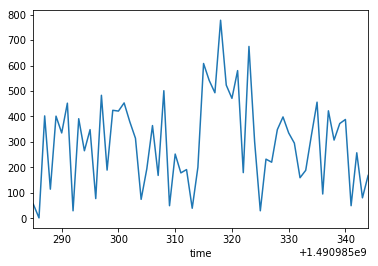

In [35]:
dfg2.plot()

In [36]:
dfg = df.groupby('src')['src'].count()
dfg.head()

src
3232235520    11
3232235521     9
3232235522     9
3232235523    14
3232235524     4
Name: src, dtype: int64

In [37]:
dfg2 = df2.groupby('src')['src'].count()
dfg2.head()

src
43382016    15
43382018     8
43382019    15
43382020     3
43382022    10
Name: src, dtype: int64

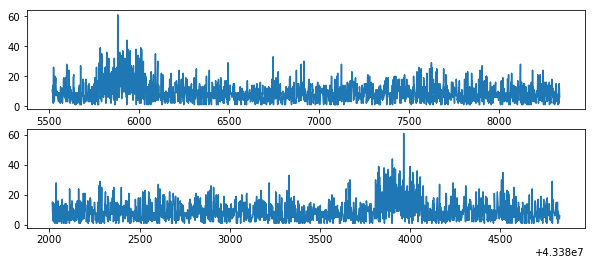

In [38]:
fig, (a, b) = plt.subplots(nrows=2, figsize=(10,4))
a.plot(dfg.index,dfg.values)
b.plot(dfg2.index,dfg2.values)
fig.show()

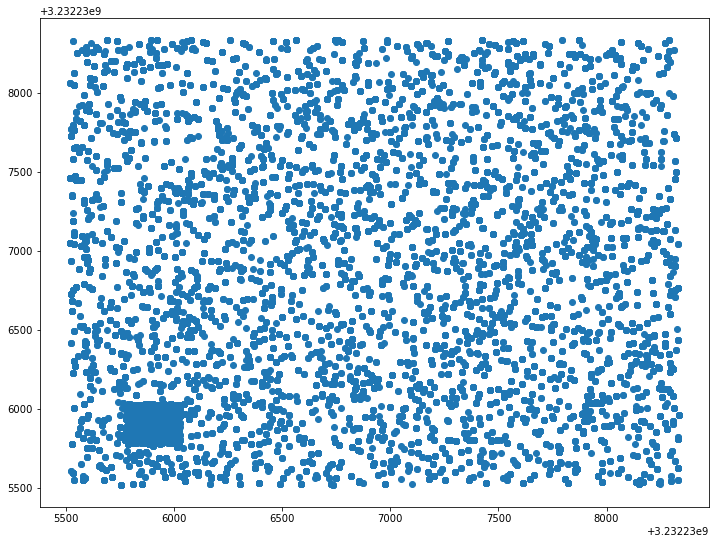

In [46]:
import math
plt.figure(figsize=(12, 9))
plt.scatter(x=df.src,y=df.dst)

plt.show()

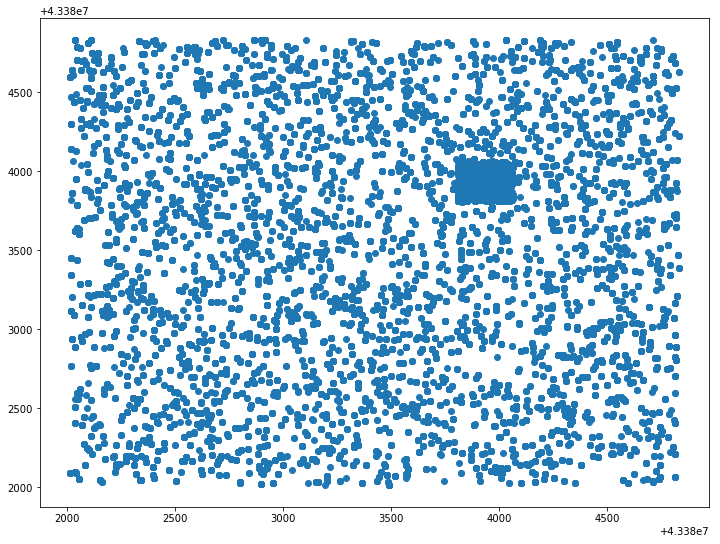

In [48]:
import math
plt.figure(figsize=(12, 9))
plt.scatter(x=df2.src,y=df2.dst)

plt.show()

In [40]:
kmeans = KMeans(n_clusters=3)
result = kmeans.fit_predict(df)
print result

[1 1 1 ..., 1 1 2]


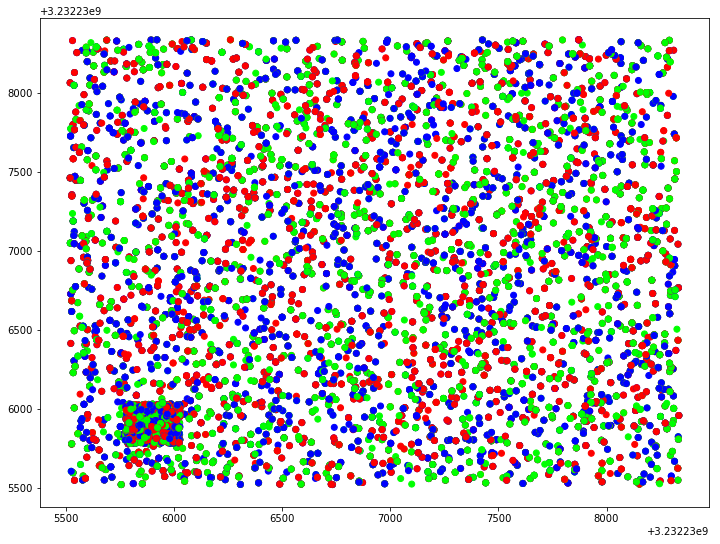

In [41]:
plt.figure(figsize=(12, 9))
color=cm.brg(np.linspace(0,1,np.max(result) - np.min(result)+1))
plt.scatter(x=df.src,y=df.dst,c=color)
plt.show()

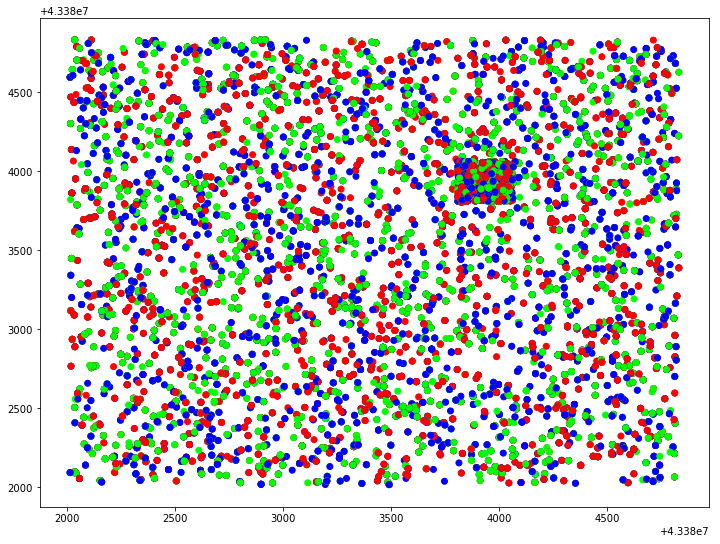

In [49]:
kmeans = KMeans(n_clusters=3)
result2 = kmeans.fit_predict(df2)
plt.figure(figsize=(12, 9))
plt.scatter(x=df2.src,y=df2.dst,c=color)
plt.show()

In [50]:
counter = 0
for i,x in enumerate(result):
    y = result2[i]
    if x == y:
        counter+=1

print counter


18014


In [51]:
kmeans = KMeans(n_clusters=3)
result = kmeans.fit_predict(df)
result2 = kmeans.fit_predict(df)
counter = 0
for i,x in enumerate(result):
    y = result2[i]
    if x == y:
        counter+=1

print counter

18014


In [52]:
import ipaddress

ip=ipaddress.ip_address(u'192.168.0.0')
print int(ip)

3232235520


In [53]:
ipaddress.IPv4Address(3232235520)

IPv4Address(u'192.168.0.0')

In [54]:
import ipaddress

ip=ipaddress.ip_address(u'192.168.255.255')
print int(ip)

3232301055


In [55]:
ipaddress.IPv4Address(3232301055)

IPv4Address(u'192.168.255.255')

In [67]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
#df = pd.read_csv("tmp/testlog2.csv",header=None, names = ('time','src','dst','sport','dport','byte'))
df = pd.read_csv("tmp/testlog2.csv",header=None, names = ('time','src','dst','sport','dport','byte'))
df.head()


,time,src,dst,sport,dport,byte
0,1490906170,3557830713,2184534138,2911,918,64348
1,1490906170,3557830713,2184534138,2911,918,270829
2,1490906170,3557830713,2184534138,2911,918,144229
3,1490906170,3557830713,2184534138,2911,918,173308
4,1490906170,3557830713,2184534138,2911,918,381578


In [70]:
dfg = df.groupby('time')['src'].count()
dfg.head()

time
1490906170    14
1490906171     6
1490906172     5
1490906173     7
1490906174    14
Name: src, dtype: int64

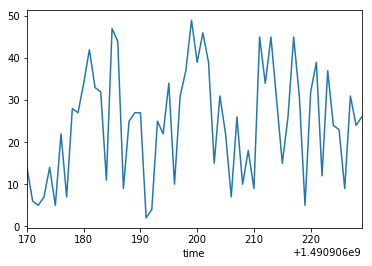

In [71]:
dfg.plot()

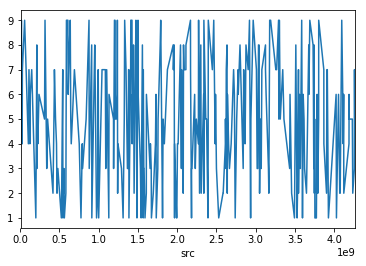

In [72]:
dfg = df.groupby('src')['src'].count()
dfg.plot()

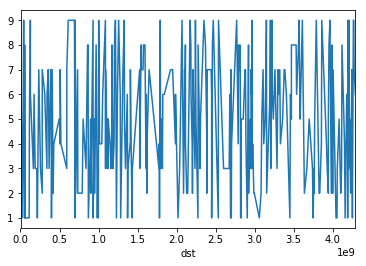

In [73]:
dfg = df.groupby('dst')['dst'].count()
dfg.plot()